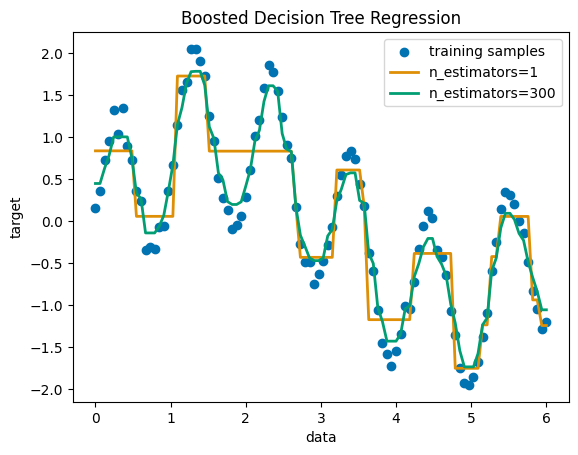

In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
X = X.round(6)
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
y = y.round(6)

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

colors = sns.color_palette("colorblind")
plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

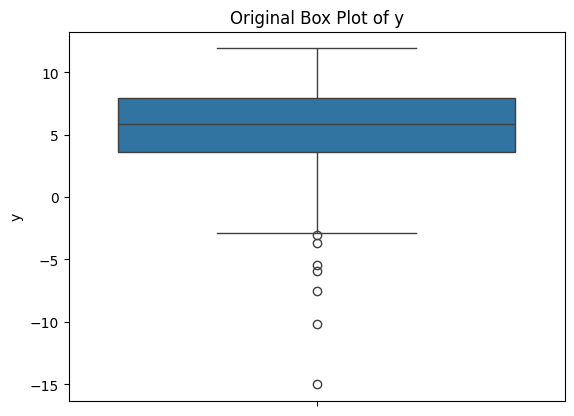

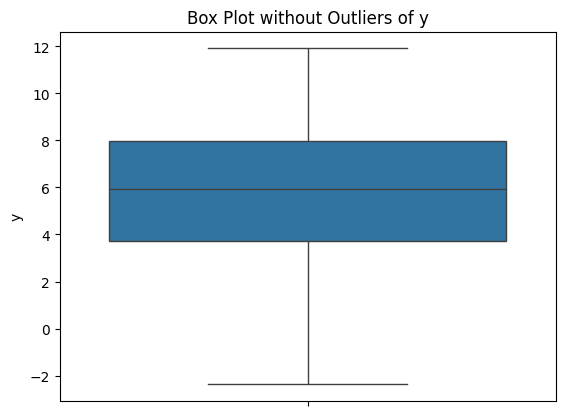

In [64]:
df = pd.read_csv(r"C:\Users\vtk_ru1\OneDrive - Servier Monde\Рабочий стол\Project ML\transneft_test\test_work_transneft\data.csv")
sampl = np.arange(12.591554, 15.030000, 0.025183)
df_pred = pd.DataFrame(sampl, columns=['x'])
#df_pred['y'] = ""

def removal_box_plot(df, y, threshold):
    sns.boxplot(df[y])
    plt.title('Original Box Plot of y')
    plt.show()
 
    removed_outliers = df[df[y] >= threshold]
 
    sns.boxplot(removed_outliers[y])
    plt.title('Box Plot without Outliers of y')
    plt.show()
    return removed_outliers
 
 
threshold_value = -2.5
 
df = removal_box_plot(df, 'y', threshold_value)

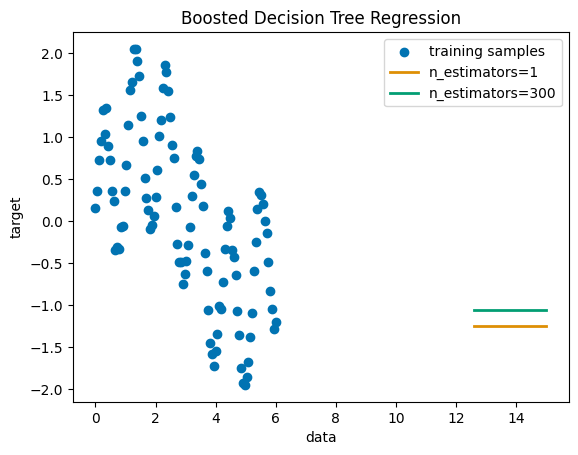

In [65]:
rng = np.random.RandomState(1)
#rng = np.random.RandomState(True)
X_2 = np.array(df_pred.x).reshape((-1, 1))
#y_2 = np.array(df_pred.y).reshape(-1,)


regr_1_2 = DecisionTreeRegressor(max_depth=4)

regr_2_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1_2.fit(X, y)
regr_2_2.fit(X, y)

y_1_2 = regr_1_2.predict(X_2)
y_2_2 = regr_2_2.predict(X_2)

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X_2, y_1_2, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X_2, y_2_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()